<a href="https://colab.research.google.com/github/minjeong-kim-git/NLP/blob/main/Day1_EVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVN

In [60]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [61]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

In [62]:
id_to_label[2]

'긍정'

In [63]:
sentences

['나는 오늘 기분이 좋아', '나는 오늘 우울해']

In [64]:
labels

[[1, 1, 1, 2], [1, 1, 0]]

## Vocabulary

In [65]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
  words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [66]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [67]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]' : 0, '[UNK]' : 1} # PAD 길이를 조절할 때, UNK: vocab에 없는 단어
for word in words:
  word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [68]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [69]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
  train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [70]:
# train_label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [71]:
# train inputs를 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [72]:
# 문장의 길이를 모두 동일하게 변경(최대 길이 4)
for row in train_inputs:
  row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [73]:
# train_inputs를 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [74]:
# train_label은 label을 그대로 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [75]:
# 정답 길이를 모두 동일하게 변경(최대 길이 4)
for row in train_labels:
  row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [76]:
# 정답 길이를 모두 동일하게 함(최대 길이 4)
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [77]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8) # n_vocab, d_model
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.00239944,  0.01298051, -0.00143493, -0.04702431,
          0.0081438 , -0.00115339, -0.01807561, -0.02821304],
        [-0.02506301, -0.03514428, -0.03639328,  0.00077137,
         -0.0363143 , -0.02708842, -0.0312502 ,  0.0428851 ],
        [ 0.03617315,  0.01006133,  0.04016559,  0.0415082 ,
          0.00346173,  0.04565665, -0.00014182,  0.02760864],
        [-0.00105236, -0.0383218 ,  0.02033425,  0.00014653,
          0.03849846,  0.0251887 , -0.0064595 , -0.01507162]],

       [[-0.00239944,  0.01298051, -0.00143493, -0.04702431,
          0.0081438 , -0.00115339, -0.01807561, -0.02821304],
        [-0.02506301, -0.03514428, -0.03639328,  0.00077137,
         -0.0363143 , -0.02708842, -0.0312502 ,  0.0428851 ],
        [-0.04744418,  0.04071274, -0.04578644, -0.03762544,
         -0.00575783,  0.03291017, -0.00125297, -0.00475202],
        [ 0.02282516, -0.01825591, -0.0113396 ,  0.03978468,
          0.0077666 , -0.

In [78]:
# 단어의 vector을 이용해서 긍정(2), 중립(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.31674874, 0.34397367, 0.33927765],
        [0.34553644, 0.3207048 , 0.33375883],
        [0.33776233, 0.32551077, 0.33672687],
        [0.34103218, 0.3361121 , 0.32285565]],

       [[0.31674874, 0.34397367, 0.33927765],
        [0.34553644, 0.3207048 , 0.33375883],
        [0.31975937, 0.34926745, 0.33097312],
        [0.33250383, 0.32005158, 0.34744453]]], dtype=float32)>

In [79]:
# 단어의 vector을 이용해서 긍정(2), 중립(1), 부정(0) 확률값 예측
linear_2 = tf.keras.layers.Dense(3)
logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[-0.03059801,  0.02596256,  0.04185672],
        [-0.01069327,  0.03069467,  0.0072494 ],
        [ 0.0952584 , -0.03186882, -0.00533497],
        [ 0.0061866 , -0.01794149,  0.01915809]],

       [[-0.03059801,  0.02596256,  0.04185672],
        [-0.01069327,  0.03069467,  0.0072494 ],
        [-0.08009638, -0.0047965 , -0.01039151],
        [ 0.04953231,  0.04816911,  0.01642272]]], dtype=float32)>

In [80]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
demoninator = np.sum(numerator, axis = 2, keepdims=True)
numerator, demoninator

(array([[[0.9698654 , 1.0263026 , 1.0427451 ],
         [0.98936373, 1.0311706 , 1.0072758 ],
         [1.099943  , 0.9686337 , 0.9946793 ],
         [1.0062058 , 0.98221844, 1.0193428 ]],
 
        [[0.9698654 , 1.0263026 , 1.0427451 ],
         [0.98936373, 1.0311706 , 1.0072758 ],
         [0.92302734, 0.99521506, 0.9896623 ],
         [1.0507796 , 1.0493481 , 1.0165583 ]]], dtype=float32),
 array([[[3.038913 ],
         [3.02781  ],
         [3.063256 ],
         [3.0077672]],
 
        [[3.038913 ],
         [3.02781  ],
         [2.9079046],
         [3.1166859]]], dtype=float32))

In [81]:
# 두 결과값 비교
probs = numerator / demoninator
probs

array([[[0.31914878, 0.33772027, 0.34313095],
        [0.32675883, 0.3405665 , 0.3326747 ],
        [0.35907644, 0.3162105 , 0.32471308],
        [0.3345358 , 0.32656065, 0.3389035 ]],

       [[0.31914878, 0.33772027, 0.34313095],
        [0.32675883, 0.3405665 , 0.3326747 ],
        [0.3174201 , 0.34224474, 0.3403352 ],
        [0.33714646, 0.33668715, 0.32616642]]], dtype=float32)

In [82]:
# dense의 weight, bias
weight, bias = linear_2.get_weights()
weight, bias

(array([[ 0.7292678 ,  0.58891684,  0.68108755],
        [-0.016065  ,  0.13055062, -0.26186424],
        [ 0.6643302 , -0.5581032 , -0.05499732],
        [ 0.71637386, -0.28714055, -0.7030724 ],
        [-0.46162003,  0.25434297,  0.09881049],
        [ 0.28247398, -0.5276772 ,  0.09703028],
        [-0.6277216 , -0.6490533 , -0.6763785 ],
        [ 0.04468441,  0.10755235, -0.02945232]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [83]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.03059801,  0.02596256,  0.04185672],
        [-0.01069327,  0.03069467,  0.0072494 ],
        [ 0.0952584 , -0.03186882, -0.00533497],
        [ 0.0061866 , -0.01794149,  0.01915809]],

       [[-0.03059801,  0.02596256,  0.04185672],
        [-0.01069327,  0.03069467,  0.0072494 ],
        [-0.08009638, -0.00479651, -0.01039151],
        [ 0.04953231,  0.04816912,  0.01642272]]], dtype=float32)

In [84]:
def build_model(n_vocab, d_model, n_seq, n_out):
  """
  동작만 하는 간단한 모델
  :param n_vocab: vocabulary 단어 수
  :param d_model: 단어를 의미하는 벡터의 차원 수
  :param n_seq: 문장 길이(단어 수)
  :param n_out: 예측할 class 개수
  """
  inputs = tf.keras.layers.Input((n_seq,)) #(bs, n_seq)
  # 입력 단어를 vector로 저장
  embedding = tf.keras.layers.Embedding(n_vocab, d_model)
  hidden = embedding(inputs)
  # 단어의 vector을 이용해서 정답 확률값 예측
  linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
  outputs = linear(hidden)
  
  # 학습할 모델 선언
  model = tf.keras.Model(inputs = inputs, outputs = outputs)
  return model

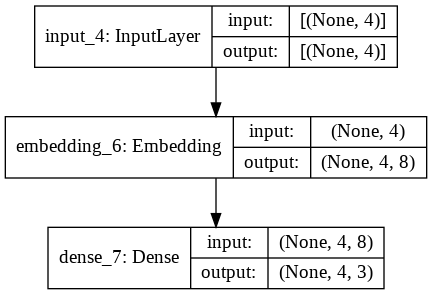

In [85]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

In [86]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 4, 8)              56        
_________________________________________________________________
dense_7 (Dense)              (None, 4, 3)              27        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 학습

In [87]:
# 모델 loss, optimizer, metric 정의
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [88]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 0s 463ms/step - loss: 1.0880 - accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0848 - accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0816 - accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0784 - accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0752 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0720 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0656 - accuracy: 0.6250
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0624 - accuracy: 0.6250
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0591 - accuracy: 0.6250
Epoch 11/100
1/1 [=========

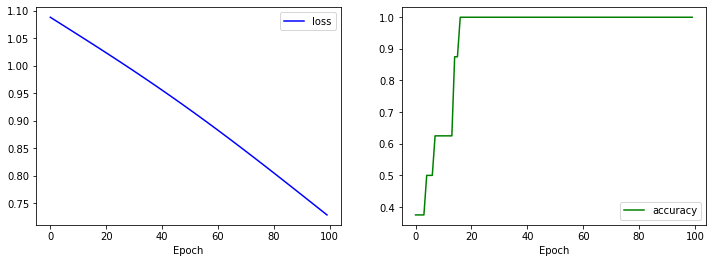

In [89]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [90]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 129ms/step - loss: 0.7252 - accuracy: 1.0000


[0.7251839637756348, 1.0]

## 예측

In [91]:
# 추론할 입력
string = "나는 기분이 우울해"

In [92]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [93]:
# 문장의 길이를 모두 동일하게 변경 (최대 길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [94]:
# numpy array로 변환(batch size 1 증가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [95]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.2949449 , 0.48121864, 0.22383654],
        [0.28549454, 0.49553776, 0.21896769],
        [0.3972852 , 0.32481876, 0.277896  ],
        [0.28252205, 0.51771843, 0.19975951]]], dtype=float32)

In [96]:
# 확률의 max 값을 추론 값으로 설정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])